In [2]:
import copy
import matplotlib.patches as patches
import Metrica_Viz as mviz
import Metrica_IO as mio
import numpy as np
import pandas as pd
from preprocessing import PreProcessing
from cmap import Colormap
from imblearn.over_sampling import SMOTE, RandomOverSampler
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering, BisectingKMeans, KMeans, SpectralClustering
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

## You'll see the data goes from 0 to 1 on each axis. The coordiante (0,0) is the top left, (1,1) is the bottom right, and (0.5,0.5) is the kick off point.

In [3]:
game_1_pre = PreProcessing(data_home="Data/sample-data/data/Sample_Game_1/Sample_Game_1_RawTrackingData_Home_Team.csv", 
                           data_away="Data/sample-data/data/Sample_Game_1/Sample_Game_1_RawTrackingData_Away_Team.csv")
game_1_data = game_1_pre.load_and_process_data()
game_2_pre = PreProcessing(data_home="Sample_Game_2_RawTrackingData_Home_Team.csv", 
                           data_away="Sample_Game_2_RawTrackingData_Away_Team.csv")
game_2_data = game_2_pre.load_and_process_data()

In [4]:
game_1_data

,Period,Frame,Time[s],Home-P_1-x,Home-P_1-y,Home-P_2-x,Home-P_2-y,Home-P_3-x,Home-P_3-y,Home-P_4-x,...,Away-P_21-x,Away-P_21-y,Away-P_22-x,Away-P_22-y,Away-P_23-x,Away-P_23-y,Away-P_24-x,Away-P_24-y,ball-x,ball-y
1,1,1,0.04,0.00082,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55243,0.43269,0.50067,0.94322,0.43693,0.05002,0.37833,0.27383,0.45472,0.38709
2,1,2,0.08,0.00096,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55243,0.43269,0.50067,0.94322,0.43693,0.05002,0.37833,0.27383,0.49645,0.40656
3,1,3,0.12,0.00114,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55243,0.43269,0.50067,0.94322,0.43693,0.05002,0.37833,0.27383,0.53716,0.42556
4,1,4,0.16,0.00121,0.48238,0.32622,0.65317,0.33687,0.48988,0.30944,...,0.55236,0.43313,0.50034,0.94391,0.43644,0.05038,0.37756,0.27473,0.55346,0.42231
5,1,5,0.20,0.00129,0.48238,0.32597,0.65269,0.33664,0.49018,0.30948,...,0.55202,0.43311,0.50017,0.94434,0.43580,0.04977,0.37663,0.27543,0.55512,0.40570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70574,1,70574,2822.96,0.01778,0.53494,NaN,NaN,0.27756,0.65976,0.25373,...,0.42717,0.78415,0.51516,0.76263,0.29943,0.46791,0.26227,0.66922,0.16653,0.90563
70575,1,70575,2823.00,0.01749,0.53456,NaN,NaN,0.27759,0.65985,0.25381,...,0.42774,0.78591,0.51511,0.76364,0.29967,0.46871,0.26259,0.66986,0.16704,0.90591
70576,1,70576,2823.04,0.01721,0.53417,NaN,NaN,0.27763,0.65984,0.25392,...,0.42830,0.78765,0.51507,0.76462,0.29991,0.46948,0.26293,0.67046,0.16755,0.90617
70577,1,70577,2823.08,0.01692,0.53375,NaN,NaN,0.27765,0.65980,0.25402,...,0.42887,0.78942,0.51504,0.76561,0.30016,0.47032,0.26325,0.67102,0.16807,0.90643


In [5]:
game_2_data

,Period,Frame,Time[s],Home-P_1-x,Home-P_1-y,Home-P_2-x,Home-P_2-y,Home-P_3-x,Home-P_3-y,Home-P_4-x,...,Away-P_21-x,Away-P_21-y,Away-P_22-x,Away-P_22-y,Away-P_23-x,Away-P_23-y,Away-P_24-x,Away-P_24-y,ball-x,ball-y
51,1,51,2.04,0.64787,0.27031,0.67763,0.42630,0.68143,0.54622,0.64436,...,0.43295,0.37750,0.49511,0.02246,0.50216,0.50376,0.49565,0.36179,0.50216,0.50376
52,1,52,2.08,0.64797,0.27005,0.67765,0.42629,0.68101,0.54602,0.64428,...,0.43299,0.37743,0.49508,0.02249,0.50214,0.50371,0.49580,0.36160,0.50040,0.50384
53,1,53,2.12,0.64805,0.26978,0.67767,0.42637,0.68060,0.54582,0.64418,...,0.43305,0.37735,0.49507,0.02242,0.50209,0.50366,0.49587,0.36151,0.49770,0.50397
54,1,54,2.16,0.64815,0.26943,0.67769,0.42634,0.68020,0.54562,0.64409,...,0.43311,0.37727,0.49505,0.02235,0.50203,0.50361,0.49598,0.36131,0.49500,0.50410
55,1,55,2.20,0.64826,0.26908,0.67770,0.42630,0.67978,0.54545,0.64398,...,0.43317,0.37719,0.49505,0.02218,0.50195,0.50356,0.49605,0.36121,0.49230,0.50422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67853,1,67853,2714.12,0.50464,0.58939,0.52868,0.71467,0.55447,0.80078,0.51242,...,0.42682,0.56888,0.36177,0.37021,0.53603,0.86863,0.46103,0.54963,0.00161,0.50354
67854,1,67854,2714.16,0.50473,0.59095,0.52857,0.71567,0.55441,0.80154,0.51242,...,0.42686,0.56960,0.36142,0.37082,0.53588,0.86944,0.46106,0.55049,0.00341,0.49632
67855,1,67855,2714.20,0.50482,0.59251,0.52846,0.71667,0.55435,0.80230,0.51242,...,0.42689,0.57027,0.36106,0.37152,0.53572,0.87025,0.46110,0.55129,0.00522,0.48911
67856,1,67856,2714.24,0.50492,0.59407,0.52836,0.71766,0.55428,0.80303,0.51242,...,0.42693,0.57099,0.36071,0.37223,0.53556,0.87106,0.46114,0.55210,0.00702,0.48190


## Tracking for individual Players for the First Period

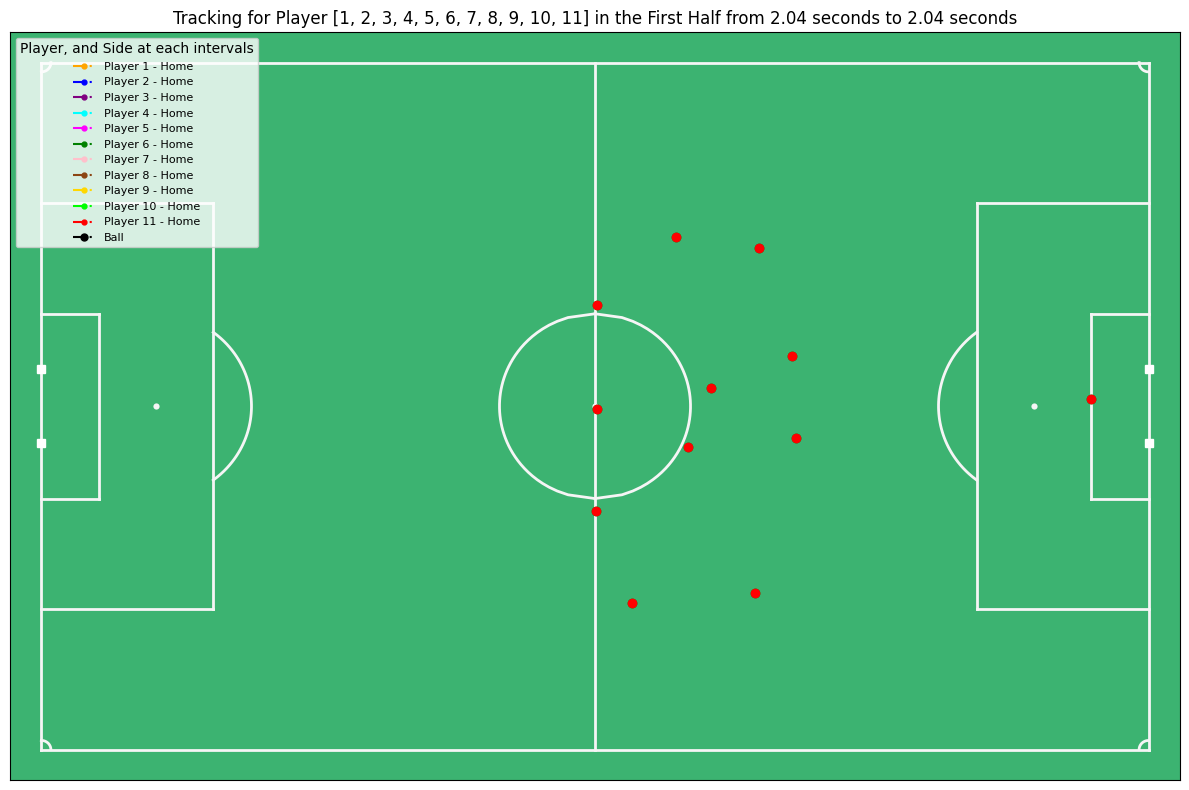

In [7]:
game_2_pre.player_tracking(game_2_data.iloc[:1], players=[1,2,3,4,5,6,7,8,9,10,11], sides=["Home"]*11)

In [ ]:
# player_tracking(period_1_data)
# player_tracking(period_1_data_home, [2])
# player_tracking(period_1_data_home, [5])
# player_tracking(period_1_data_home, [8])

# Grouping players time interval on 1 second interval

In [8]:
game_1_data

,Period,Frame,Time[s],Home-P_1-x,Home-P_1-y,Home-P_2-x,Home-P_2-y,Home-P_3-x,Home-P_3-y,Home-P_4-x,...,Away-P_21-x,Away-P_21-y,Away-P_22-x,Away-P_22-y,Away-P_23-x,Away-P_23-y,Away-P_24-x,Away-P_24-y,ball-x,ball-y
1,1,1,0.04,0.00082,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55243,0.43269,0.50067,0.94322,0.43693,0.05002,0.37833,0.27383,0.45472,0.38709
2,1,2,0.08,0.00096,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55243,0.43269,0.50067,0.94322,0.43693,0.05002,0.37833,0.27383,0.49645,0.40656
3,1,3,0.12,0.00114,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55243,0.43269,0.50067,0.94322,0.43693,0.05002,0.37833,0.27383,0.53716,0.42556
4,1,4,0.16,0.00121,0.48238,0.32622,0.65317,0.33687,0.48988,0.30944,...,0.55236,0.43313,0.50034,0.94391,0.43644,0.05038,0.37756,0.27473,0.55346,0.42231
5,1,5,0.20,0.00129,0.48238,0.32597,0.65269,0.33664,0.49018,0.30948,...,0.55202,0.43311,0.50017,0.94434,0.43580,0.04977,0.37663,0.27543,0.55512,0.40570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70574,1,70574,2822.96,0.01778,0.53494,NaN,NaN,0.27756,0.65976,0.25373,...,0.42717,0.78415,0.51516,0.76263,0.29943,0.46791,0.26227,0.66922,0.16653,0.90563
70575,1,70575,2823.00,0.01749,0.53456,NaN,NaN,0.27759,0.65985,0.25381,...,0.42774,0.78591,0.51511,0.76364,0.29967,0.46871,0.26259,0.66986,0.16704,0.90591
70576,1,70576,2823.04,0.01721,0.53417,NaN,NaN,0.27763,0.65984,0.25392,...,0.42830,0.78765,0.51507,0.76462,0.29991,0.46948,0.26293,0.67046,0.16755,0.90617
70577,1,70577,2823.08,0.01692,0.53375,NaN,NaN,0.27765,0.65980,0.25402,...,0.42887,0.78942,0.51504,0.76561,0.30016,0.47032,0.26325,0.67102,0.16807,0.90643


In [9]:
def vel_acc(dataset: pd.DataFrame) -> pd.DataFrame:
    """
    Calculates the velocity and acceleration of players and ball in a given dataset.
    
    Parameters:
    dataset (pandas.DataFrame): The input dataset containing player and ball positions over time.
    
    Returns:
    pandas.DataFrame: The original dataset with additional columns for velocity and acceleration.
    """
    temp_data = copy.deepcopy(dataset)
    star_idx = temp_data.columns.get_loc("Time[s]")
    player_columns = temp_data.columns[star_idx + 1:]

    for i in range(0, player_columns.shape[0] - 1, 2):
        # Calculate Euclidean distance between consecutive points
        ply_x, ply_y = player_columns[i], player_columns[i + 1]

        x_diff = temp_data[ply_x].diff()
        y_diff = temp_data[ply_y].diff()
        
        # Calculate time difference between frames
        time_diff = temp_data['Time[s]'].diff()
        
        # Calculate velocity (distance travelled / time)
        vx = x_diff / time_diff
        vy = y_diff / time_diff
        velocity = np.sqrt(vx**2 + vy**2)
        
        # Calculate acceleration (change in velocity / time)
        ax = vx.diff() / time_diff
        ay = vy.diff() / time_diff
        acceleration = np.sqrt(ax**2 + ay**2)
        
        if "ball" in ply_x:
            temp_data[f"ball_velocity"] = velocity
            temp_data[f"ball_acceleration"] = acceleration
        else:
            players_num = ply_x[7]
            if len(ply_x) == 11:
                players_num = ply_x[7:9]
                
            temp_data[f"P_{players_num}_velocity"] = velocity
            temp_data[f"P_{players_num}_acceleration"] = acceleration
    
    return temp_data

In [10]:
def get_frames(dataset: pd.DataFrame, players: list[int], frame: int, frame_interval: int = 2000) -> pd.DataFrame:
    start_range = dataset.index[0] if frame - frame_interval < dataset.index[0] else frame - frame_interval
    end_range = dataset.index[-1] if frame + frame_interval + 1 > dataset.index[-1] else frame + frame_interval + 1
    
    index = pd.RangeIndex(start=start_range, stop=end_range, step=1)
    temp_data = pd.DataFrame(index=index)
    # temp_data["Time[s]"] = dataset["Time[s]"]

    for i in players:
        if int(i[2:]) < 15:
            # The index is the same as frames
            temp_data[f"Home-{i}-x"] = dataset.loc[start_range:end_range, f"Home-{i}-x"]
            temp_data[f"Home-{i}-y"] = dataset.loc[start_range:end_range, f"Home-{i}-y"]
        else:
            # The index is the same as frames
            temp_data[f"Away-{i}-x"] = dataset.loc[start_range:end_range, f"Away-{i}-x"]
            temp_data[f"Away-{i}-y"] = dataset.loc[start_range:end_range, f"Away-{i}-y"]
        
        temp_data[f"{i}_velocity"] = dataset.loc[start_range:end_range, f"{i}_velocity"]
        temp_data[f"{i}_acceleration"] = dataset.loc[start_range:end_range, f"{i}_acceleration"]
        
    return temp_data

# Tracking players closest to the ball using frames

In [11]:
vel_acc_game_1_data = vel_acc(game_1_data)
vel_acc_game_2_data = vel_acc(game_2_data)

In [12]:
vel_acc_game_1_data

,Period,Frame,Time[s],Home-P_1-x,Home-P_1-y,Home-P_2-x,Home-P_2-y,Home-P_3-x,Home-P_3-y,Home-P_4-x,...,P_21_velocity,P_21_acceleration,P_22_velocity,P_22_acceleration,P_23_velocity,P_23_acceleration,P_24_velocity,P_24_acceleration,ball_velocity,ball_acceleration
1,1,1,0.04,0.00082,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2,0.08,0.00096,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,1.151215,NaN
3,1,3,0.12,0.00114,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.123138,0.701923
4,1,4,0.16,0.00121,0.48238,0.32622,0.65317,0.33687,0.48988,0.30944,...,0.011138,0.278458,0.019121,0.478033,0.015201,0.380019,0.029611,0.740275,0.415521,20.643085
5,1,5,0.20,0.00129,0.48238,0.32597,0.65269,0.33664,0.49018,0.30948,...,0.008515,0.333366,0.011560,0.190804,0.022103,0.613456,0.029100,0.160078,0.417319,12.387292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70574,1,70574,2822.96,0.01778,0.53494,NaN,NaN,0.27756,0.65976,0.25373,...,0.047202,0.025769,0.025031,0.008839,0.022150,0.013975,0.016325,0.025769,0.014427,0.008839
70575,1,70575,2823.00,0.01749,0.53456,NaN,NaN,0.27759,0.65985,0.25381,...,0.046250,0.025000,0.025281,0.006250,0.020881,0.031869,0.017889,0.039528,0.014545,0.006250
70576,1,70576,2823.04,0.01721,0.53417,NaN,NaN,0.27763,0.65984,0.25392,...,0.045697,0.013975,0.024520,0.019764,0.020163,0.018750,0.017241,0.027951,0.014311,0.012500
70577,1,70577,2823.08,0.01692,0.53375,NaN,NaN,0.27765,0.65980,0.25402,...,0.046488,0.019764,0.024761,0.008839,0.021910,0.044194,0.016125,0.027951,0.014534,0.006250


In [13]:
vel_acc_game_2_data

,Period,Frame,Time[s],Home-P_1-x,Home-P_1-y,Home-P_2-x,Home-P_2-y,Home-P_3-x,Home-P_3-y,Home-P_4-x,...,P_21_velocity,P_21_acceleration,P_22_velocity,P_22_acceleration,P_23_velocity,P_23_acceleration,P_24_velocity,P_24_acceleration,ball_velocity,ball_acceleration
51,1,51,2.04,0.64787,0.27031,0.67763,0.42630,0.68143,0.54622,0.64436,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,1,52,2.08,0.64797,0.27005,0.67765,0.42629,0.68101,0.54602,0.64428,...,0.002016,NaN,0.001061,NaN,0.001346,NaN,0.006052,NaN,0.044045,NaN
53,1,53,2.12,0.64805,0.26978,0.67767,0.42637,0.68060,0.54582,0.64418,...,0.002500,1.397542e-02,0.001768,6.373774e-02,0.001768,1.875000e-02,0.002850,0.080039,0.067578,5.883305e-01
54,1,54,2.16,0.64815,0.26943,0.67769,0.42634,0.68020,0.54562,0.64409,...,0.002500,3.469447e-14,0.001820,6.250000e-03,0.001953,6.250000e-03,0.005706,0.073154,0.067578,6.938894e-14
55,1,55,2.20,0.64826,0.26908,0.67770,0.42630,0.67978,0.54545,0.64398,...,0.002500,3.469447e-14,0.004250,6.373774e-02,0.002358,1.250000e-02,0.003052,0.067315,0.067567,6.250000e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67853,1,67853,2714.12,0.50464,0.58939,0.52868,0.71467,0.55447,0.80078,0.51242,...,0.017794,3.750000e-02,0.020918,6.250000e-03,0.020594,8.838835e-03,0.021274,0.038017,0.064010,1.769026e+00
67854,1,67854,2714.16,0.50473,0.59095,0.52857,0.71567,0.55441,0.80154,0.51242,...,0.018028,8.838835e-03,0.017582,9.375000e-02,0.020594,0.000000e+00,0.021513,0.008839,0.186025,3.052004e+00
67855,1,67855,2714.20,0.50482,0.59251,0.52846,0.71667,0.55435,0.80230,0.51242,...,0.016767,3.186887e-02,0.019679,5.659616e-02,0.020641,6.250000e-03,0.020025,0.038017,0.185843,8.838835e-03
67856,1,67856,2714.24,0.50492,0.59407,0.52836,0.71766,0.55428,0.80303,0.51242,...,0.018028,3.186887e-02,0.019790,8.838835e-03,0.020641,6.938894e-14,0.020275,0.006250,0.185782,6.250000e-03


In [14]:
game_1_ply_tra = vel_acc_game_1_data.loc[:70578, "Home-P_1-x":]
game_2_ply_tra = vel_acc_game_2_data.loc[:67852, "Home-P_1-x":]

In [15]:
game_1_players, game_1_ball, game_1_vel_acc = game_1_ply_tra.loc[:,"Home-P_1-x":"Away-P_24-y"], game_1_ply_tra.loc[:,"ball-x":"ball-y"], game_1_ply_tra.loc[:,"P_1_velocity":]
game_2_players, game_2_ball, game_2_vel_acc = game_2_ply_tra.loc[:,"Home-P_1-x":"Away-P_24-y"], game_2_ply_tra.loc[:,"ball-x":"ball-y"], game_2_ply_tra.loc[:,"P_1_velocity":]

In [16]:
game_1_players.sample(5), game_2_players.sample(5)

(       Home-P_1-x  Home-P_1-y  Home-P_2-x  Home-P_2-y  Home-P_3-x  Home-P_3-y  \
 59119     0.12110     0.47469         NaN         NaN     0.36678     0.47651   
 66958     0.13483     0.52360         NaN         NaN     0.40979     0.88046   
 36628     0.08171     0.41537     0.38194     0.77176     0.27316     0.55300   
 33        0.00022     0.48064     0.32264     0.61109     0.33089     0.47075   
 5057      0.14172     0.53089     0.41389     0.93648     0.35477     0.81967   
 
        Home-P_4-x  Home-P_4-y  Home-P_5-x  Home-P_5-y  ...  Away-P_20-x  \
 59119     0.37042     0.33265     0.37910     0.19280  ...      0.67319   
 66958     0.39702     0.73651     0.40677     0.51393  ...      0.60851   
 36628     0.28173     0.24584     0.36719     0.02986  ...      0.55399   
 33        0.31598     0.33560     0.32333     0.17513  ...      0.56639   
 5057      0.35671     0.69842     0.36117     0.55418  ...      0.60312   
 
        Away-P_20-y  Away-P_21-x  Away-P_21-y  A

In [17]:
game_1_ball.sample(5), game_2_ball.sample(5)

(        ball-x   ball-y
 22771  0.57140  0.66105
 48565  0.18357  0.16739
 7000   0.31251  0.73680
 64324  0.28365  0.15497
 13543  0.04366  0.44224,
         ball-x   ball-y
 35762  0.71666  0.37282
 5288   0.62451  0.70560
 55348  0.50052  0.75570
 22285  0.13866  0.42619
 8023   0.54543  0.44758)

In [18]:
game_1_vel_acc.sample(5), game_2_vel_acc.sample(5)

(       P_1_velocity  P_1_acceleration  P_2_velocity  P_2_acceleration  \
 3739       0.009500          0.006250      0.006727      3.186887e-02   
 42155      0.005062          0.012500      0.000791      5.143246e-14   
 20377      0.006250          0.019764      0.021272      2.253470e-02   
 463        0.006828          0.008839      0.036967      1.976424e-02   
 60862      0.006828          0.013975           NaN               NaN   
 
        P_3_velocity  P_3_acceleration  P_4_velocity  P_4_acceleration  \
 3739       0.014056          0.013975      0.012993          0.044194   
 42155      0.015508          0.031869      0.012811          0.019764   
 20377      0.026885          0.022535      0.024220          0.022535   
 463        0.032524          0.050389      0.034851          0.031250   
 60862      0.020156          0.036443      0.028304          0.018750   
 
        P_5_velocity  P_5_acceleration  ...  P_21_velocity  P_21_acceleration  \
 3739       0.024404       

In [19]:
game_1_player_data = get_frames(game_1_ply_tra, players=game_1_pre.PLAYER_NAMES, frame=2000).fillna(0)
game_2_player_data = get_frames(game_2_ply_tra, players=game_2_pre.PLAYER_NAMES, frame=2000).fillna(0)

# Classification

In [20]:
def change_player_name(data: pd.Series) -> pd.Series:
    result = []
    name = ""
    for i in range(len(data)):
        item = data.iloc[i]
        if len(item) == 8:
            if int(item[-2:]) < 12:
                name = f"Home-P_{item[-2:]}"
            else:
                name = f"Away-P_{item[-2:]}"
        else:
            name = f"Home-P_{item[-1:]}"
            
        result.append(name)

    return pd.Series(data=result, name=data.name)

In [21]:
game_1_event_data = pd.read_csv("Data/sample-data/data/Sample_Game_1/Sample_Game_1_RawEventsData.csv")
game_2_event_data = pd.read_csv("Sample_Game_2_RawEventsData.csv")

game_1_event_data = game_1_event_data[game_1_event_data["Period"] == 1]
game_2_event = game_2_event_data[game_2_event_data["Period"] == 1]

In [22]:
game_1_event_data = game_1_event_data[["Type", "Start Frame", "End Frame", "From", "To"]]
game_1_event_data["Current Player"] = change_player_name(game_1_event_data["To"].combine_first(game_1_event_data["From"]))

game_2_event_data = game_2_event_data[["Type", "Start Frame", "End Frame", "From", "To"]]
game_2_event_data["Current Player"] = change_player_name(game_2_event_data["To"].combine_first(game_2_event_data["From"]))

In [23]:
start_frames = np.array(game_1_event_data["Start Frame"].iloc[1:])
end_frames = np.array(game_1_event_data["End Frame"].iloc[1:])

assert start_frames.shape == end_frames.shape
frame_ranges = [np.sort(np.array([i, j])) for i, j in zip(end_frames, start_frames)]

game_1_event = pd.DataFrame()
end = game_1_player_data.index[-1] + 1
for i, f in enumerate(frame_ranges):
    e = f[1] if end > f[1] else end
    for j in range(f[0], e):
        game_1_event.loc[j, "Type"] =  game_1_event_data.loc[i + 1, "Type"]

C:\Users\noill\AppData\Local\Temp\ipykernel_104508\4237095821.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'PASS' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  game_1_event.loc[j, "Type"] =  game_1_event_data.loc[i + 1, "Type"]


In [24]:
start_frames = np.array(game_2_event_data["Start Frame"].iloc[1:])
end_frames = np.array(game_2_event_data["End Frame"].iloc[1:])

assert start_frames.shape == end_frames.shape
frame_ranges = [np.sort(np.array([i, j])) for i, j in zip(end_frames, start_frames)]

game_2_event = pd.DataFrame()
end = game_2_player_data.index[-1] + 1
for i, f in enumerate(frame_ranges):
    e = f[1] if end > f[1] else end
    for j in range(f[0], e):
        game_2_event.loc[j, "Type"] =  game_2_event_data.loc[i + 1, "Type"]

C:\Users\noill\AppData\Local\Temp\ipykernel_104508\217539190.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'PASS' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  game_2_event.loc[j, "Type"] =  game_2_event_data.loc[i + 1, "Type"]


In [25]:
game_1_event

,Type
1,PASS
2,PASS
3,PASS
4,PASS
5,PASS
...,...
3989,PASS
3990,PASS
3991,PASS
3992,PASS


In [26]:
game_2_event

,Type
51,PASS
52,PASS
53,PASS
54,PASS
55,PASS
...,...
3954,PASS
3955,PASS
3956,PASS
3957,PASS


In [27]:
game_1_player_data

,Home-P_1-x,Home-P_1-y,P_1_velocity,P_1_acceleration,Home-P_2-x,Home-P_2-y,P_2_velocity,P_2_acceleration,Home-P_3-x,Home-P_3-y,...,P_22_velocity,P_22_acceleration,Away-P_23-x,Away-P_23-y,P_23_velocity,P_23_acceleration,Away-P_24-x,Away-P_24-y,P_24_velocity,P_24_acceleration
1,0.00082,0.48238,0.000000,0.000000,0.32648,0.65322,0.000000,0.000000,0.33701,0.48863,...,0.000000,0.000000,0.43693,0.05002,0.000000,0.000000,0.37833,0.27383,0.000000,0.000000
2,0.00096,0.48238,0.003500,0.000000,0.32648,0.65322,0.000000,0.000000,0.33701,0.48863,...,0.000000,0.000000,0.43693,0.05002,0.000000,0.000000,0.37833,0.27383,0.000000,0.000000
3,0.00114,0.48238,0.004500,0.025000,0.32648,0.65322,0.000000,0.000000,0.33701,0.48863,...,0.000000,0.000000,0.43693,0.05002,0.000000,0.000000,0.37833,0.27383,0.000000,0.000000
4,0.00121,0.48238,0.001750,0.068750,0.32622,0.65317,0.006619,0.165478,0.33687,0.48988,...,0.019121,0.478033,0.43644,0.05038,0.015201,0.380019,0.37756,0.27473,0.029611,0.740275
5,0.00129,0.48238,0.002000,0.006250,0.32597,0.65269,0.013530,0.268823,0.33664,0.49018,...,0.011560,0.190804,0.43580,0.04977,0.022103,0.613456,0.37663,0.27543,0.029100,0.160078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,0.11058,0.49158,0.009411,0.006250,0.46645,0.80766,0.017237,0.025769,0.45502,0.61824,...,0.001118,0.019764,0.43720,0.39656,0.017665,0.013975,0.43770,0.45959,0.013363,0.069877
3997,0.11093,0.49143,0.009520,0.025769,0.46671,0.80700,0.017734,0.019764,0.45529,0.61689,...,0.000901,0.013975,0.43781,0.39617,0.018100,0.045501,0.43820,0.45958,0.012502,0.093958
3998,0.11126,0.49122,0.009779,0.039528,0.46695,0.80636,0.017088,0.017678,0.45555,0.61555,...,0.001031,0.008839,0.43839,0.39573,0.018200,0.036443,0.43869,0.45968,0.012502,0.069034
3999,0.11160,0.49101,0.009991,0.006250,0.46720,0.80575,0.016481,0.019764,0.45579,0.61423,...,0.001250,0.012500,0.43892,0.39562,0.013532,0.208604,0.43917,0.45994,0.013647,0.100195


In [28]:
X_1 = game_1_player_data.loc[game_1_event.index]
y_1 = np.array([game_1_event["Type"]]).T

In [29]:
X_2 = game_2_player_data.loc[game_2_event.index]
y_2 = np.array([game_2_event["Type"]]).T

In [30]:
X = pd.concat([X_1, X_2])
y = np.concatenate((y_1, y_2), axis=0)

assert X.shape[0] == y.shape[0]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
np.unique(y, return_counts=True)

(array(['BALL LOST', 'BALL OUT', 'PASS', 'SHOT'], dtype=object),
 array([ 784,   81, 2281,   20], dtype=int64))

In [34]:
smote = SMOTE(random_state=42, k_neighbors=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [35]:
np.unique(y_train_resampled, return_counts=True)

(array(['BALL LOST', 'BALL OUT', 'PASS', 'SHOT'], dtype=object),
 array([1843, 1843, 1843, 1843], dtype=int64))

In [36]:
lg = LogisticRegression(random_state=0)
lg.fit(X_train_resampled, y_train_resampled)
lg_y_pred = lg.predict(X_test)

accuracy = accuracy_score(y_test, lg_y_pred)
print("Logistic regression accuracy:", accuracy)

Logistic regression accuracy: 0.9542586750788643


C:\Users\noill\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train_resampled, y_train_resampled)
rfc_y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, rfc_y_pred)
print("Random forest classifier accuracy:", accuracy)

Random forest classifier accuracy: 0.9968454258675079


In [38]:
adc = AdaBoostClassifier(random_state=0)
adc.fit(X_train_resampled, y_train_resampled)
adc_y_pred = adc.predict(X_test)

accuracy = accuracy_score(y_test, adc_y_pred)
print("AdaBoost classifier accuracy:", accuracy)

AdaBoost classifier accuracy: 0.6340694006309149
